In [6]:
import pandas as pd
import requests as re
import zipfile
import io
import numpy as np

# Download data

In [19]:
data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00341/HAPT%20Data%20Set.zip'
file = re.get(data)
z = zipfile.ZipFile(io.BytesIO(file.content))
z.extractall()

In [13]:
y_train = pd.read_csv('Train/y_train.txt', sep = " ", header=None)
x_train = pd.read_csv('Train/x_train.txt', sep = " ", header=None)
x_test = pd.read_csv('Test/X_test.txt', sep = " ", header=None)
y_test = pd.read_csv('Test/y_test.txt', sep = " ", header=None)

In [20]:
features = f"features.txt"

In [20]:
with open(features, 'r') as f:  
    columns = ["".join(elt.split()) for elt in f.readlines()]

In [22]:
y_train.shape, x_train.shape

((7767, 1), (7767, 561))

In [21]:
x_train.columns = columns
x_test.columns = columns
x_train.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [16]:
x = pd.concat([x_train, x_test]).reset_index(drop=True)
y = pd.concat([y_train, y_test]).reset_index(drop=True)
x["target"] = y 
x

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,target
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,5
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,5
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,5
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,5
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,5
5,0.038988,0.004109,-0.017340,-0.997438,-0.993485,-0.996692,-0.997522,-0.993494,-0.996916,-0.801982,...,-0.554902,-0.844224,0.082632,-0.143439,0.275041,-0.368224,-0.849927,0.184795,-0.035326,5
6,0.039897,-0.005324,-0.020457,-0.997024,-0.977313,-0.987782,-0.996898,-0.977450,-0.989391,-0.800606,...,-0.235576,-0.571126,-0.212754,-0.230622,0.014637,-0.189512,-0.852441,0.182142,-0.036203,5
7,0.039082,-0.016047,-0.030241,-0.996662,-0.976996,-0.986672,-0.996380,-0.977594,-0.989310,-0.800606,...,-0.104337,-0.432022,-0.020888,0.593996,-0.561871,0.467383,-0.851309,0.183751,-0.035176,5
8,0.039026,-0.007410,-0.027301,-0.997431,-0.973190,-0.988183,-0.997491,-0.971557,-0.990156,-0.800245,...,-0.286366,-0.579474,0.012954,0.080936,-0.234313,0.117797,-0.848270,0.188955,-0.030594,5
9,0.040354,0.004245,-0.017932,-0.994906,-0.981181,-0.990046,-0.995300,-0.982483,-0.990920,-0.799717,...,0.306076,0.115919,-0.020590,-0.127730,-0.482871,-0.070670,-0.848592,0.190283,-0.027667,5


# Visualization


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

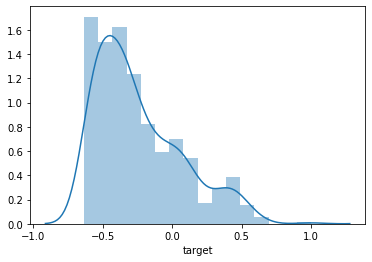

In [40]:
corr_matrix = x.corr()
sns.distplot(corr_matrix["target"]);

In [43]:
best_10_features = corr_matrix["target"].apply(lambda x: np.abs(x)).sort_values(ascending=False).iloc[1:20]
best_10_features

tBodyAccJerk-Min-1        0.638353
tBodyAccJerkMag-Mean-1    0.633594
tBodyAccJerkMag-SMA-1     0.633594
tBodyAccJerk-SMA-1        0.631958
fBodyAccJerk-STD-1        0.631437
tBodyAccJerk-Mad-1        0.629925
fBodyAccJerk-STD-2        0.629127
tBodyAccJerk-Mad-2        0.628810
fBodyAccJerk-Max-2        0.627477
tBodyAccJerk-IQR-1        0.627407
tBodyAccJerk-IQR-2        0.626210
fBodyAccJerk-Mad-1        0.625694
tBodyAccJerk-STD-1        0.624497
tBodyAccJerk-STD-2        0.622398
fBodyAccJerk-Mad-2        0.621177
fBodyAccJerk-Max-1        0.620446
fBodyAccJerk-SMA-1        0.616978
tBodyAccJerkMag-IQR-1     0.616945
fBodyAccJerk-Mean-1       0.614748
Name: target, dtype: float64

In [46]:
cols = ["target"] + best_10_features.index.tolist()
corr_bests = corr_matrix.loc[cols, cols]

,target,tBodyAccJerk-Min-1,tBodyAccJerkMag-Mean-1,tBodyAccJerkMag-SMA-1,tBodyAccJerk-SMA-1,fBodyAccJerk-STD-1,tBodyAccJerk-Mad-1,fBodyAccJerk-STD-2,tBodyAccJerk-Mad-2,fBodyAccJerk-Max-2,tBodyAccJerk-IQR-1,tBodyAccJerk-IQR-2,fBodyAccJerk-Mad-1,tBodyAccJerk-STD-1,tBodyAccJerk-STD-2,fBodyAccJerk-Mad-2,fBodyAccJerk-Max-1,fBodyAccJerk-SMA-1,tBodyAccJerkMag-IQR-1,fBodyAccJerk-Mean-1
target,1.000000,0.638353,-0.633594,-0.633594,-0.631958,-0.631437,-0.629925,-0.629127,-0.628810,-0.627477,-0.627407,-0.626210,-0.625694,-0.624497,-0.622398,-0.621177,-0.620446,-0.616978,-0.616945,-0.614748
tBodyAccJerk-Min-1,0.638353,1.000000,-0.944187,-0.944187,-0.941851,-0.952607,-0.949507,-0.904966,-0.917697,-0.877506,-0.925045,-0.908624,-0.958990,-0.958934,-0.914094,-0.911692,-0.920238,-0.946850,-0.925948,-0.959469
tBodyAccJerkMag-Mean-1,-0.633594,-0.944187,1.000000,1.000000,0.999613,0.984247,0.988991,0.967024,0.977005,0.944489,0.978422,0.965825,0.984034,0.986788,0.973544,0.969960,0.962473,0.996002,0.983966,0.983598
tBodyAccJerkMag-SMA-1,-0.633594,-0.944187,1.000000,1.000000,0.999613,0.984247,0.988991,0.967024,0.977005,0.944489,0.978422,0.965825,0.984034,0.986788,0.973544,0.969960,0.962473,0.996002,0.983966,0.983598
tBodyAccJerk-SMA-1,-0.631958,-0.941851,0.999613,0.999613,1.000000,0.981753,0.986654,0.966930,0.976844,0.944804,0.976251,0.965705,0.981666,0.984384,0.973337,0.969618,0.959666,0.996310,0.983692,0.981297
fBodyAccJerk-STD-1,-0.631437,-0.952607,0.984247,0.984247,0.981753,1.000000,0.995919,0.934106,0.944721,0.908490,0.979531,0.934223,0.995618,0.996895,0.941004,0.938960,0.982900,0.977397,0.974144,0.988283
tBodyAccJerk-Mad-1,-0.629925,-0.949507,0.988991,0.988991,0.986654,0.995919,1.000000,0.938289,0.950637,0.912775,0.989627,0.941244,0.994158,0.997746,0.946338,0.943510,0.978088,0.983186,0.974763,0.993783
fBodyAccJerk-STD-2,-0.629127,-0.904966,0.967024,0.967024,0.966930,0.934106,0.938289,1.000000,0.994040,0.983146,0.928461,0.970479,0.935428,0.935866,0.996855,0.996326,0.909135,0.961151,0.953472,0.932329
tBodyAccJerk-Mad-2,-0.628810,-0.917697,0.977005,0.977005,0.976844,0.944721,0.950637,0.994040,1.000000,0.974544,0.941115,0.987248,0.946713,0.948038,0.996790,0.993480,0.919504,0.971712,0.957224,0.945883
fBodyAccJerk-Max-2,-0.627477,-0.877506,0.944489,0.944489,0.944804,0.908490,0.912775,0.983146,0.974544,1.000000,0.906636,0.955443,0.907831,0.908569,0.974700,0.967881,0.886028,0.934240,0.928930,0.903580


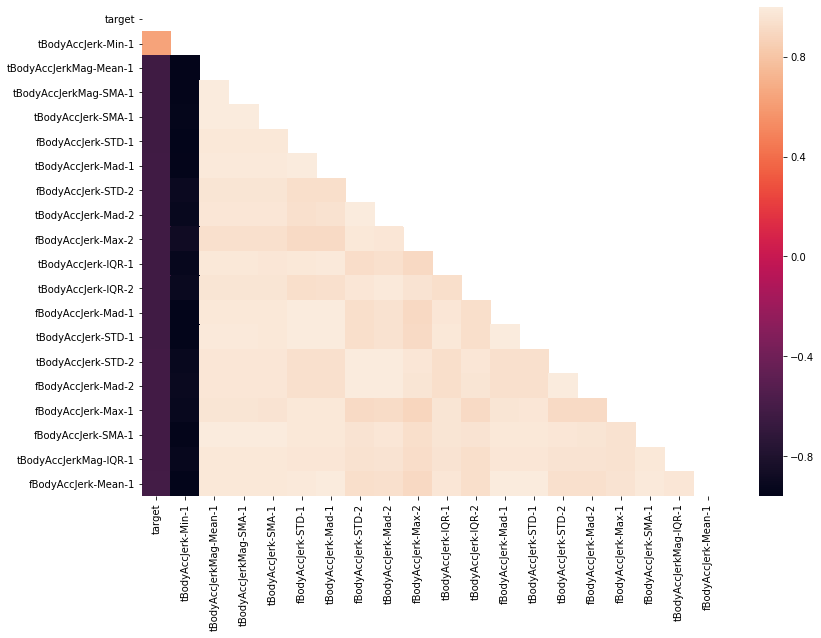

In [52]:
mask = np.triu(np.ones_like(corr_bests, dtype=np.bool))
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(corr_bests, mask=mask)

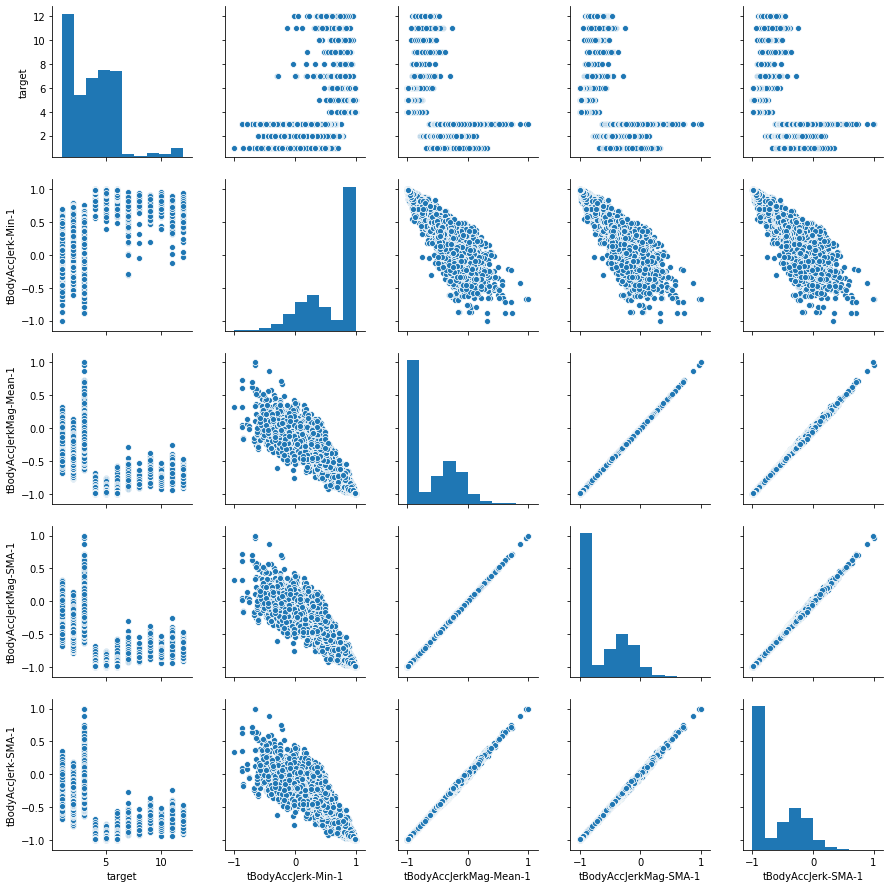

In [53]:
sns.pairplot(x[cols[0:5]])

On voit que beaucoup de variables sont corrélées entre elles 

# Modélisation

C'est un problème de classification on peut utiliser de nombreux algorithmes d'arbres, SVM, ensemblistes ou regression logistique par exemple.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from tqdm import tqdm_notebook
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

On test chaque modèle avec ses paramètres de base. 

In [58]:
str(estimator.__class__.__name__).split(".")[-1]

NameError: name 'estimator' is not defined

In [59]:
result = []

for estimator in tqdm_notebook([DecisionTreeClassifier(),
                  SVC(),
                  LogisticRegression(),
                  RandomForestClassifier(),
                  AdaBoostClassifier()]):
    estimator.fit(x_train, y_train)
    prediction = estimator.predict(x_test)
    
    result.append({"name":estimator.__class__.__name__, 
                   "precision":precision_score(y_test, prediction, average="weighted"), 
                   "recall":recall_score(y_test, prediction, average="weighted"), 
                   "f1_score": f1_score(y_test, prediction, average="weighted")})

C:\Users\jennifer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jennifer\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jennifer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jennifer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted 

In [60]:
pd.DataFrame(result).set_index("name")

,f1_score,precision,recall
name,,,
DecisionTreeClassifier,0.810943,0.813703,0.810247
SVC,0.914090,0.916479,0.918090
LogisticRegression,0.944655,0.945893,0.945288
RandomForestClassifier,0.895229,0.896723,0.895952
AdaBoostClassifier,0.385111,0.326703,0.519608


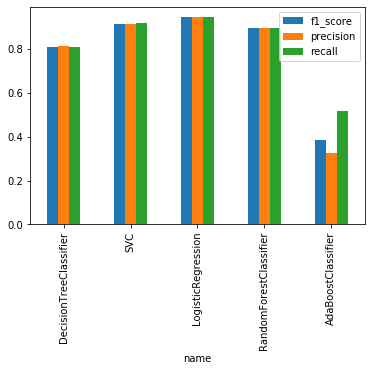

In [61]:
pd.DataFrame(result).set_index("name").plot(kind="bar")

On voit que la régression logistique performe le mieux par rapport aux autres algorithmes plus complexes. On peut essayer d'optimiser les hyper paramètres avec une GridSearch.

In [63]:
logreg = LogisticRegression(multi_class="auto", solver="saga")
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Tous les paramètres sur lesquels on peut influer pour une regression logistique.

In [68]:
grid={"C":np.logspace(-2,2,4), "penalty":["l1","l2"], "tol":np.logspace(-5,-2,4)}


logreg = LogisticRegression(multi_class="auto", solver="saga")
logreg_cv = GridSearchCV(logreg,
                         grid,cv=10, 
                         verbose=1,
                         n_jobs=-1)

On réalise une GridSearch qui va comparer l'ensemble des combinaisons de paramètres. Le paramètre n_jobs permet de paralléliser la recherche. Le paramètre cv permet de créer une cross validation en 10 buckets.

In [71]:
logreg_cv.fit(x_train, np.ravel(y_train),)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 82.0min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed: 139.1min finished
C:\Users\jennifer\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 2.15443469e-01, 4.64158883e+00, 1.00000000e+02]),
                         'penalty': ['l1', 'l2'],
                         'tol': array([1.e-05, 1.e-04, 1.e-03, 1.e-02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

L'entrainement a pris un peu plus de 140min.

In [72]:
logreg_cv.best_params_

{'C': 4.6415888336127775, 'penalty': 'l1', 'tol': 0.0001}

Voici les meilleurs paramètres d'entrées

In [73]:
prediction, prediction_proba = logreg_cv.predict(x_test),  logreg_cv.predict_proba(x_test)

On peut vérifier la performance du modèle pour chaque classe donnée. Grâce à une matrice de confusion qui met en comparaison les prédiction et les valeurs escomptées.

In [77]:
confusion_matrix(y_test, prediction)

array([[493,   1,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 29, 441,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  16, 401,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   4,   0, 445,  58,   1,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,  13, 540,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 545,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   2,   2,   0,  16,   0,   1,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,  10,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,   0,   9,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  20,   0,   5],
       [  2,   1,   0,   1,   0,   0,   0,   0,  12,   1,  32,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   6,   4,  16]],
      dtype=int64)

In [78]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       0.93      0.99      0.96       496
           2       0.95      0.94      0.94       471
           3       0.99      0.95      0.97       420
           4       0.97      0.88      0.92       508
           5       0.90      0.97      0.93       556
           6       1.00      1.00      1.00       545
           7       0.94      0.70      0.80        23
           8       1.00      1.00      1.00        10
           9       0.64      0.72      0.68        32
          10       0.74      0.80      0.77        25
          11       0.70      0.65      0.67        49
          12       0.76      0.59      0.67        27

    accuracy                           0.94      3162
   macro avg       0.88      0.85      0.86      3162
weighted avg       0.94      0.94      0.94      3162



In [79]:
precision_score(y_test, prediction, average="weighted")

0.9442935671506336

# API Flask

On peut la faire en flask ce qui permet de créer une API beaucoup plus rapidement. De plus, beaucoup d'avantages à utiliser Django sont la connection à une base de données comme MySQL ou Postgres. Dans notre cas, cela pourrait être intéressant de stocker les résultats dans une base de données mais pour les besoins de l'exercice nous pouvons nous passer d'une base de données. 

In [1]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
from flask import Flask
from flask import request

In [30]:
app = Flask(__name__)

data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00341/HAPT%20Data%20Set.zip'
features = f"features.txt"
result = []

@app.route('/')
@app.route('/health')
def health():
    return {"success":True, "message":"Api is running fine"}

@app.route('/download')
def download():
    file = re.get(data)
    z = zipfile.ZipFile(io.BytesIO(file.content))
    z.extractall()
    
    with open(features, 'r') as f:  
        columns = ["".join(elt.split()) for elt in f.readlines()]
                   
    return {"success":True, "message":f"Successfully download data" }

@app.route('/train')
def train():
    y_train = pd.read_csv('Train/y_train.txt', sep = " ", header=None)
    x_train = pd.read_csv('Train/x_train.txt', sep = " ", header=None)
    x_train.columns = columns
    
    x_test = pd.read_csv('Test/X_test.txt', sep = " ", header=None)
    y_test = pd.read_csv('Test/y_test.txt', sep = " ", header=None)
    x_test.columns = columns
                       
    for estimator in tqdm_notebook([DecisionTreeClassifier(),
                  SVC(),
                  LogisticRegression(),
                  RandomForestClassifier(),
                  AdaBoostClassifier()]):
        estimator.fit(x_train, y_train)
        prediction = estimator.predict(x_test)
    
    result.append({"name":estimator.__class__.__name__, 
                   "precision":precision_score(y_test, prediction, average="weighted"), 
                   "recall":recall_score(y_test, prediction, average="weighted"), 
                   "f1_score": f1_score(y_test, prediction, average="weighted")})
                   
    return {"success":True, "message":"Successfully trained model", "data":{"results":result}}

@app.route('/gridsearch')
def optimize():
    if request.method == 'POST':
        grid = request.form
    else:
        grid = {"C":np.logspace(-2,2,4), "penalty":["l1","l2"], "tol":np.logspace(-5,-2,4)}

        logreg = LogisticRegression(multi_class="auto", solver="saga")
        logreg_cv = RandomizedSearchCV(logreg,
                                 grid,cv=10, 
                                 verbose=1,
                                 n_jobs=-1)
            logreg_cv.fit(x_train, np.ravel(y_train),)
        prediction = logreg_cv.predict(x_test)

        result.append({"best_param":logreg_cv.best_params_, 
                       "precision":precision_score(y_test, prediction, average="weighted"), 
                       "recall":recall_score(x_test, prediction, average="weighted"), 
                       "f1_score": f1_score(x_test, prediction, average="weighted")})
                           
    return {"success":True, "message":"Successfully trained model", "data":{"results":result}}


@app.route('/predict')
def predict():
    return logreg_cv.fit(x_train, np.ravel(y_train),)

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Jan/2020 23:52:41] "GET / HTTP/1.1" 200 -
C:\Users\jennifer\Anaconda3\lib\site-packages\joblib\parallel.py:673: UserWarning: Loky-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\jennifer\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\jennifer\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\jennifer\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\jennifer\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
